In [14]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


### IMPORTING DATA 

In [15]:
from sklearn.linear_model import LinearRegression
import pandas as pd

In [16]:
import yfinance as yf

nvda = yf.Ticker("NVDA") #
asml = yf.Ticker("ASML") #
aapl = yf.Ticker("AAPL") #
goog = yf.Ticker("GOOG") #
tsmc = yf.Ticker("TSM") #
s_p = yf.Ticker("^GSPC")
ndx = yf.Ticker("^NDX")
spgtsi = yf.Ticker("^SPGSTI")
amd = yf.Ticker("AMD")
intel = yf.Ticker("INTL")
copper = yf.Ticker("HG=F")
gold = yf.Ticker("GC=F")
silver = yf.Ticker("SI=F")
platinum = yf.Ticker("PL=F")
uranium = yf.Ticker("URA")
coal = yf.Ticker("COAL")

In [17]:
coal.history(start="2020-01-01")['Close']


Date
2024-01-24 00:00:00-05:00    24.735535
2024-01-25 00:00:00-05:00    24.499866
2024-01-26 00:00:00-05:00    24.606897
2024-01-29 00:00:00-05:00    24.778740
2024-01-30 00:00:00-05:00    24.772850
                               ...    
2025-10-30 00:00:00-04:00    22.351999
2025-10-31 00:00:00-04:00    22.775000
2025-11-03 00:00:00-05:00    22.861000
2025-11-04 00:00:00-05:00    22.160000
2025-11-06 00:00:00-05:00    22.770000
Name: Close, Length: 449, dtype: float64

In [18]:
import pandas as pd

# Read the Excel file
Excel = pd.read_excel('EE-Data1.xlsx', sheet_name='Full Stock analysis ')



In [19]:
dividends = Excel["Unnamed: 24"][6:1262].astype('float64')

Stock_splits = Excel["Unnamed: 25"][6:1262].astype('float64')

## IMPORTANT STUFF STARTS HERE

In [20]:
dividends = Excel["Unnamed: 24"][6:1262].astype('float64')

Stock_splits = Excel["Unnamed: 25"][6:1262].astype('float64')

### Define Data 

In [21]:
data = {
    "X1": asml.history(start="2020-01-01")['Close'], #
    "X2": aapl.history(start="2020-01-01")['Close'], #
    # "X10": goog.history(start="2020-01-01")['Close'],
    "X3": tsmc.history(start="2020-01-01")['Close'],
    # "X5": s_p.history(start="2020-01-01")['Close'],
    # "X6": ndx.history(start="2020-01-01")['Close'],
    # "X4": amd.history(start="2020-01-01")['Close'], #
    # "X4": copper.history(start="2020-01-01")['Close'], #
    # "X10": gold.history(start="2020-01-01")['Close'],``
    # "X10": silver.history(start="2020-01-01")['Close'],
    "X4": platinum.history(start="2020-01-01")['Close'], #
    "X5": uranium.history(start="2020-01-01")['Close'], #
    "X6": nvda.history(start="2020-01-01")['Dividends'], # 
    # "X7": nvda.history(period="5y")["Stock Splits"], #
    "Y": nvda.history(start="2020-01-01")['Close'],
}



In [22]:
str(data["X1"][1266-3])

/var/folders/wb/pmxl4r0s6svgkb08w2drl86c0000gn/T/ipykernel_42369/939567163.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  str(data["X1"][1266-3])


'732.01513671875'

### Filtering Data 

In [23]:
# Create DataFrame first to work with rows
df_temp = pd.DataFrame(data)

# Filter rows where all columns have valid (non-null) data
data_filtered = df_temp.dropna()

print(f"Original data shape: {df_temp.shape}")
print(f"Filtered data shape: {data_filtered.shape}")
print(f"Removed {df_temp.shape[0] - data_filtered.shape[0]} rows with missing data")

data_filtered

Original data shape: (1472, 7)
Filtered data shape: (1469, 7)
Removed 3 rows with missing data


,X1,X2,X3,X4,X5,X6,Y
Date,,,,,,,
2020-01-02 00:00:00-05:00,286.903198,72.538506,53.924866,978.599976,9.309088,0.0,5.971409
2020-01-03 00:00:00-05:00,282.279907,71.833290,52.146542,984.500000,9.267003,0.0,5.875832
2020-01-06 00:00:00-05:00,280.034515,72.405685,51.544765,960.400024,9.258585,0.0,5.900473
2020-01-07 00:00:00-05:00,283.075684,72.065155,52.380043,966.000000,9.199667,0.0,5.971908
2020-01-08 00:00:00-05:00,286.012665,73.224419,52.766254,959.000000,9.081832,0.0,5.983108
...,...,...,...,...,...,...,...
2025-10-29 00:00:00-04:00,1070.839966,269.700012,305.089996,1591.300049,56.470001,0.0,207.039993
2025-10-30 00:00:00-04:00,1075.449951,271.399994,303.220001,1608.300049,56.189999,0.0,202.889999
2025-10-31 00:00:00-04:00,1059.229980,270.369995,300.429993,1569.800049,55.119999,0.0,202.490005


In [24]:
data = pd.DataFrame(data)

means = []
stds = []

# for z in range(0,len(data["Y"])):
#     for i in data:
#         print(data[i][z])

data.std()

X1    191.014659
X2     47.133473
X3     55.277725
X4    154.158590
X5      8.937848
X6      0.000766
Y      53.562757
dtype: float64

In [25]:
#Clean out any outliars 

df = pd.DataFrame(data)

df = df.dropna()

def std_filter(data):
    means = data.mean()
    stds = data.std()    

    filtered_values = []

    for idx in range(len(data)):
        row = data.iloc[idx]

        # Check if every column's value is within mean ± std specifically for that column
        in_range = ((row >= (means - stds)) & (row <= (means + stds))).all()

        if in_range:
            filtered_values.append(row)

    df_filtered = pd.DataFrame(filtered_values, columns=data.columns)
    return df_filtered


df_cleaned = std_filter(df)
df_cleaned

,X1,X2,X3,X4,X5,X6,Y
2020-12-15 00:00:00-05:00,448.603119,124.605743,96.489906,1038.099976,12.853260,0.0,13.323776
2020-12-18 00:00:00-05:00,456.192902,123.417007,96.150162,1041.900024,12.784935,0.0,13.235517
2020-12-23 00:00:00-05:00,453.688446,127.606903,95.670715,1016.200012,12.947203,0.0,12.973490
2020-12-24 00:00:00-05:00,461.784912,128.591034,97.708427,1028.000000,12.964285,0.0,12.958032
2020-12-28 00:00:00-05:00,459.060608,133.190201,97.874382,1042.199951,13.229035,0.0,12.864541
...,...,...,...,...,...,...,...
2025-04-17 00:00:00-04:00,635.441467,196.499023,150.711731,967.299988,22.870001,0.0,101.477226
2025-04-21 00:00:00-04:00,620.085510,192.688339,146.858017,957.799988,22.450001,0.0,96.897812
2025-04-22 00:00:00-04:00,633.982300,199.252289,150.374023,953.400024,22.660000,0.0,98.877556
2025-04-23 00:00:00-04:00,653.130127,204.100433,156.740601,970.700012,23.660000,0.0,102.697075


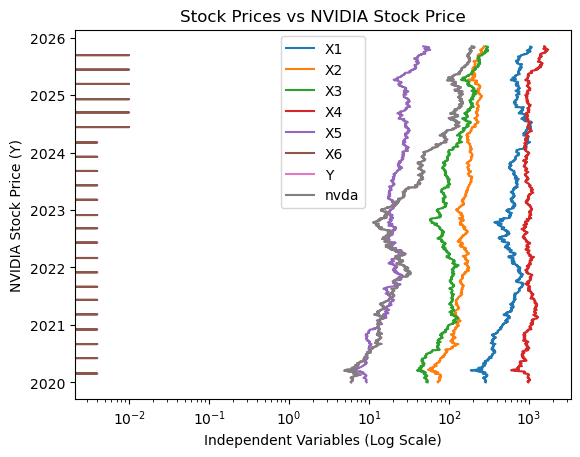

In [26]:
import matplotlib.pyplot as plt

#func to plot data for humans to see/understand 

def plot_data_log(data): 
    df = pd.DataFrame(data)

    y = df.index

    for i in data: 
        plt.plot(df[i],y, label=i, marker='o', markersize=1, linestyle='')

    plt.xscale('log')

    plt.plot(df[i],y, label="nvda", marker='o', markersize=1, linestyle='')

    plt.legend()
    plt.xlabel('Independent Variables (Log Scale)')
    plt.ylabel('NVIDIA Stock Price (Y)')
    plt.title('Stock Prices vs NVIDIA Stock Price')

def plot_data_log_y(data, dotsize=1): 
    df = pd.DataFrame(data)

    for i in data: 

        if i == "Y":
            continue

        plt.plot(df[i], df["Y"], label=i, marker='o', markersize=dotsize, linestyle='')

    plt.xscale('log')

    # plt.plot(y,df["Y"], label="nvda", marker='o', markersize=1, linestyle='')

    plt.legend()
    plt.xlabel('Independent Variables (Log Scale)')
    plt.ylabel('NVIDIA Stock Price (Y)')
    plt.title('Stock Prices vs NVIDIA Stock Price')

#Func to plot data for human to see (And Save The Plot as PNG)

def plot_data_log_SAVE(data): 
    df = pd.DataFrame(data)

    y = df.index

    for i in data: 
        plt.plot(df[i], y, label=i)

    plt.xscale('log')

    plt.plot(df["Y"], y, label="nvda")

    plt.legend()

    plt.xlabel('Independent Variables (Log Scale)')
    plt.ylabel('NVIDIA Stock Price (Y)')
    plt.title('Stock Prices vs NVIDIA Stock Price')

    plt.savefig('my_high_res_plot.png', dpi=300)

plot_data_log_SAVE(data)

In [27]:
# Export data to excel for Gerry 

df = pd.DataFrame(data)

# Convert index to timezone-naive (remove timezone)
df.index = df.index.tz_localize(None)

# Now export to Excel
df.to_excel('exported_data.xlsx')

### LRM STARTS HERE 

In [28]:
df = pd.DataFrame(data)

df = std_filter(df)  # remove rows with missing data

X = df.drop('Y', axis=1)
y = df['Y']

# Initialize and fit the model
model = LinearRegression()
model.fit(X, y)

Coefs = []

# Print coefficients to show the importance of each variable
for var, coef in zip(X.columns, model.coef_):
    print(f"{var}: {coef}")
    Coefs.append([var, coef])

X1: -0.02122382395733684
X2: 0.5149057098353713
X3: 0.3543931350402489
X4: -0.015798268540323752
X5: 0.7359514676676265
X6: 0.0


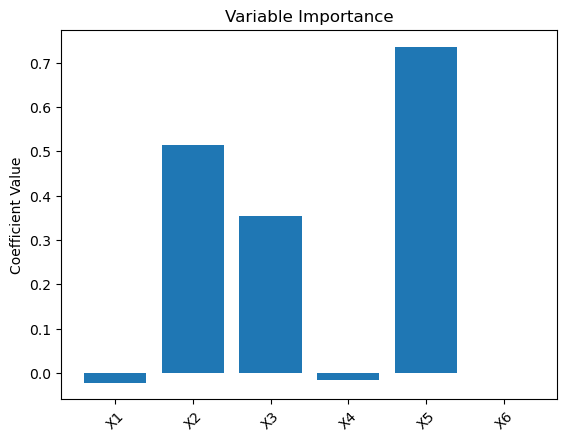

In [29]:
import matplotlib.pyplot as plt
import numpy as np

names = [item[0] for item in Coefs]
values = [float(item[1]) for item in Coefs]  # ensure values are floats

plt.bar(names, values)
plt.xticks(rotation=45)
plt.ylabel('Coefficient Value')
plt.title('Variable Importance')
plt.show()

## Testing the Model

In [30]:
import statsmodels.api as sm

# Assume df is your DataFrame with independent variables X1, X2,... and dependent variable Y
X = df.drop('Y', axis=1)
y = df['Y']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Get summary which includes p-values
print(model.summary())

# Or just get the p-values directly:
p_values = model.pvalues
print(p_values)

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     336.9
Date:                Thu, 06 Nov 2025   Prob (F-statistic):          1.08e-174
Time:                        09:55:32   Log-Likelihood:                -2207.1
No. Observations:                 631   AIC:                             4426.
Df Residuals:                     625   BIC:                             4453.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -73.1682      7.471     -9.794      0.0

/opt/homebrew/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1967: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


In [31]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

# Create DataFrame from data dictionary
df = pd.DataFrame(data)

# Drop rows with missing values to avoid errors during modeling
df = df.dropna()

# Build the formula string dynamically from your independent variables
independent_vars = "+".join([f"X{i}" for i in range(1, 7)])
formula = f"Y ~ {independent_vars}"

# Fit the OLS regression model
model = smf.ols(formula=formula, data=df).fit()

# Run the Breusch-Pagan test
bp_test = sms.het_breuschpagan(model.resid, model.model.exog)
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']

# Print Breusch-Pagan test results
for label, value in zip(labels, bp_test):
    print(f"{label}: {value}")

Lagrange multiplier statistic: 45.67622079727562
p-value: 3.434091970524834e-08
f-value: 7.819564761179767
f p-value: 2.6480692492709376e-08


In [32]:
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

df = pd.DataFrame(data).dropna()

X = df[[f'X{i}' for i in range(1, 7)]]
X = sm.add_constant(X)
y = df['Y']

model = sm.OLS(y, X).fit()

# print(f"Length of model.resid: {len(model.resid)}")
# print(f"Shape of model.model.exog: {model.model.exog.shape}")
# print(np.isnan(model.resid).any(), np.isinf(model.resid).any())
# print(np.isnan(model.model.exog).any(), np.isinf(model.model.exog).any())
# exog_df = pd.DataFrame(model.model.exog)
# print(exog_df.columns[exog_df.nunique() == 1])  # constant columns
# print(exog_df.columns.duplicated()) 

white_test = sms.het_white(model.resid, model.model.exog)

labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']
for label, value in zip(labels, white_test):
    print(f"{label}: {value}")

#! Error likely comes from the multicollinearity of the independent variables, it is too high. 
#* solved it, sort of.

Test Statistic: 248.22841834159067
Test Statistic p-value: 1.2111383453464846e-37
F-Statistic: 10.852187929657212
F-Test p-value: 1.0115357086790369e-41


In [33]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

df = pd.DataFrame(data).dropna()

# Exclude dependent variable Y for VIF calculation
X = df[[f"X{i}" for i in range(1, 7)]]

# Add constant term for intercept
X = sm.add_constant(X)

# Calculate VIF for each explanatory variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

  Variable         VIF
0    const  113.034370
1       X1    3.186278
2       X2    6.674448
3       X3    6.709248
4       X4    2.510543
5       X5    7.483229
6       X6    1.002518


# Monthly Linear Regression Model

### Data 

In [43]:
Excel2 = pd.read_excel('EE-Data1.xlsx', sheet_name='Sheet1')

commercial_elec_price = Excel2["Unnamed: 1"][14:81].astype('float64')
industrial_elec_price = Excel2["Unnamed: 2"][14:81].astype('float64')

industrial_elec_price

14    6.37
15    6.44
16    6.39
17    6.39
18    6.54
      ... 
75    8.23
76    8.26
77    8.21
78    8.30
79    8.86
Name: Unnamed: 2, Length: 66, dtype: float64

In [45]:
commercial_elec_price.head

<bound method NDFrame.head of 14    10.18
15    10.30
16    10.34
17    10.37
18    10.40
      ...  
75    13.09
76    13.27
77    13.09
78    12.96
79    13.63
Name: Unnamed: 1, Length: 66, dtype: float64>

In [35]:
commercial_elec_price.index = asml.history(start="2020-01-01")['Close'].resample('ME').last().iloc[:-3].index
industrial_elec_price.index = asml.history(start="2020-01-01")['Close'].resample('ME').last().iloc[:-3].index

data2 = {
    "X1": asml.history(start="2020-01-01")['Close'].resample('ME').last().iloc[:-3], 
    "X2": aapl.history(start="2020-01-01")['Close'].resample('ME').last().iloc[:-3], 
    "X3": tsmc.history(start="2020-01-01")['Close'].resample('ME').last().iloc[:-3],
    "X4": amd.history(start="2020-01-01")['Close'].resample('ME').last().iloc[:-3], 
    "X5": platinum.history(start="2020-01-01")['Close'].resample('ME').last().iloc[:-3], 
    "X6": uranium.history(start="2020-01-01")['Close'].resample('ME').last().iloc[:-3], 
    "X7": commercial_elec_price, #* US commercial electricity price
    "X8": industrial_elec_price, #* US commercial electricity price
    "Y": nvda.history(start="2020-01-01")['Close'].resample('ME').last().iloc[:-3],
}



ValueError: Length mismatch: Expected axis has 66 elements, new values have 68 elements

In [ ]:
plot_data_log_y(data2)

NameError: name 'data2' is not defined

## LRM 2

In [ ]:
df = pd.DataFrame(data2)

df_cleaned = std_filter(df)

X = df_cleaned.drop('Y', axis=1)
y = df_cleaned['Y']

# Initialize and fit the model
model = LinearRegression()
model.fit(X, y)

Coefs = []

# Print coefficients to show the importance of each variable
for var, coef in zip(X.columns, model.coef_):
    print(f"{var}: {coef}")
    Coefs.append([var, coef])

X1: 0.0012739371876145222
X2: 0.14176018225824333
X3: 0.2782764620394645
X4: 0.19918649876927302
X5: -0.021714456156766013
X6: 0.35019889453660463
X7: 18.708259318521357
X8: -9.274244928689338


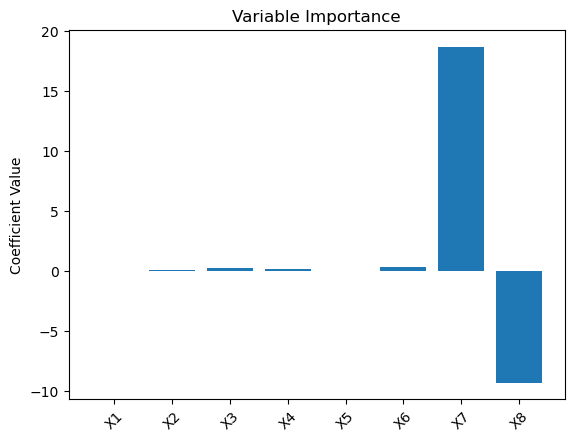

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

names = [item[0] for item in Coefs]
values = [float(item[1]) for item in Coefs]  # ensure values are floats

plt.bar(names, values)
plt.xticks(rotation=45)
plt.ylabel('Coefficient Value')
plt.title('Variable Importance')
plt.show()

## Test Model

In [ ]:
import statsmodels.api as sm

# Assume df is your DataFrame with independent variables X1, X2,... and dependent variable Y
X = df.drop('Y', axis=1)
y = df['Y']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Get summary which includes p-values
print(model.summary())

# Or just get the p-values directly:
p_values = model.pvalues
print(p_values)

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     119.1
Date:                Mon, 29 Sep 2025   Prob (F-statistic):           1.04e-32
Time:                        20:04:48   Log-Likelihood:                -249.23
No. Observations:                  66   AIC:                             516.5
Df Residuals:                      57   BIC:                             536.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -104.6143     43.155     -2.424      0.0

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

# Create DataFrame from data dictionary
df = pd.DataFrame(data2)
df = std_filter(df)

# Drop rows with missing values to avoid errors during modeling
df = df.dropna()

# Build the formula string dynamically from your independent variables
independent_vars = "+".join([f"X{i}" for i in range(1, len(df.columns))])
formula = f"Y ~ {independent_vars}"

# Fit the OLS regression model
model = smf.ols(formula=formula, data=df).fit()

# Run the Breusch-Pagan test
bp_test = sms.het_breuschpagan(model.resid, model.model.exog)
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']

# Print Breusch-Pagan test results
for label, value in zip(labels, bp_test):
    print(f"{label}: {value}")

Lagrange multiplier statistic: 13.451612726013934
p-value: 0.0972269621004064
f-value: 3.030523119096832
f p-value: 0.05198208845935076


In [ ]:
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

df = std_filter(pd.DataFrame(data2).dropna())

X = df[[f'X{i}' for i in range(1, len(df.columns))]]
X = sm.add_constant(X)
y = df['Y']

model = sm.OLS(y, X).fit()

# print(f"Length of model.resid: {len(model.resid)}")
# print(f"Shape of model.model.exog: {model.model.exog.shape}")
# print(np.isnan(model.resid).any(), np.isinf(model.resid).any())
# print(np.isnan(model.model.exog).any(), np.isinf(model.model.exog).any())
# exog_df = pd.DataFrame(model.model.exog)
# print(exog_df.columns[exog_df.nunique() == 1])  # constant columns
# print(exog_df.columns.duplicated()) 

white_test = sms.het_white(model.resid, model.model.exog)

labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']
for label, value in zip(labels, white_test):
    print(f"{label}: {value}")

Test Statistic: 19.0
Test Statistic p-value: 0.39182348254493965
F-Statistic: nan
F-Test p-value: nan


In [ ]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

df = std_filter(pd.DataFrame(data2).dropna())

# Exclude dependent variable Y for VIF calculation
X = df[[f"X{i}" for i in range(1, len(df.columns))]]

# Add constant term for intercept
X = sm.add_constant(X)

# Calculate VIF for each explanatory variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

  Variable          VIF
0    const  7552.442389
1       X1     3.592507
2       X2     6.106796
3       X3     7.166832
4       X4     5.625203
5       X5     2.276010
6       X6     1.753742
7       X7    14.144834
8       X8     6.600404


## LRM 3

Data

In [36]:
commercial_elec_price.index = asml.history(start="2020-01-01")['Close'].resample('ME').last().iloc[:-3].index
industrial_elec_price.index = asml.history(start="2020-01-01")['Close'].resample('ME').last().iloc[:-3].index

data3 = { 
    "X1": copper.history(start="2020-01-01")['Close'].resample('ME').last().iloc[:-3], #* Copper Price
    "X2": gold.history(start="2020-01-01")['Close'].resample('ME').last().iloc[:-3], #* Gold Price
    "X3": silver.history(start="2020-01-01")['Close'].resample('ME').last().iloc[:-3], #* Silver Price
    "X4": platinum.history(start="2020-01-01")['Close'].resample('ME').last().iloc[:-3], #* Platinum Price 
    "X5": uranium.history(start="2020-01-01")['Close'].resample('ME').last().iloc[:-3], #* Uranium Price
    # "X6": coal.history(start="2020-01-01")['Close'].resample('ME').last().iloc[:-3], #* Coal Price
    "X6": commercial_elec_price, #* US commercial electricity price
    "X7": industrial_elec_price, #* US commercial electricity price 
    "Y": nvda.history(start="2020-01-01")['Close'].resample('ME').last().iloc[:-3],
}

ValueError: Length mismatch: Expected axis has 66 elements, new values have 68 elements

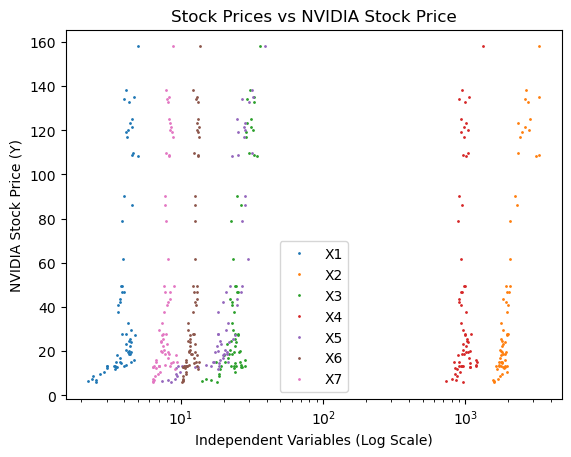

In [ ]:
plot_data_log_y(data3)

In [ ]:
coal.history(start="2020-01-01")['Close'].resample('ME').last().iloc[:-3], #* Coal Price

(Date
 2024-01-31 00:00:00-05:00    24.640285
 2024-02-29 00:00:00-05:00    22.630215
 2024-03-31 00:00:00-04:00    22.496670
 2024-04-30 00:00:00-04:00    22.968008
 2024-05-31 00:00:00-04:00    24.522449
 2024-06-30 00:00:00-04:00    23.390251
 2024-07-31 00:00:00-04:00    23.883196
 2024-08-31 00:00:00-04:00    21.665932
 2024-09-30 00:00:00-04:00    23.359810
 2024-10-31 00:00:00-04:00    22.740196
 2024-11-30 00:00:00-05:00    23.547365
 2024-12-31 00:00:00-05:00    20.775999
 2025-01-31 00:00:00-05:00    19.757999
 2025-02-28 00:00:00-05:00    17.674999
 2025-03-31 00:00:00-04:00    17.291000
 2025-04-30 00:00:00-04:00    16.920000
 2025-05-31 00:00:00-04:00    16.865999
 2025-06-30 00:00:00-04:00    17.440001
 Freq: ME, Name: Close, dtype: float64,)

In [ ]:
df = std_filter(pd.DataFrame(data3))

df = df.dropna()  # remove rows with missing data

X = df.drop('Y', axis=1)
y = df['Y']

# Initialize and fit the model
model = LinearRegression()
model.fit(X, y)

Coefs = []

# Print coefficients to show the importance of each variable
for var, coef in zip(X.columns, model.coef_):
    print(f"{var}: {coef}")
    Coefs.append([var, coef])

X1: -16.92464109275555
X2: 0.02582373426210293
X3: 1.8447424959628083
X4: -0.11716220875643137
X5: 1.0504827093874496
X6: 6.860759768190297
X7: -15.17324211379604


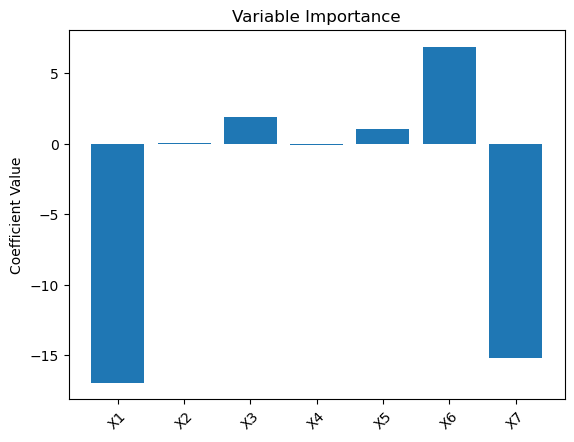

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

names = [item[0] for item in Coefs]
values = [float(item[1]) for item in Coefs]  # ensure values are floats

plt.bar(names, values)
plt.xticks(rotation=45)
plt.ylabel('Coefficient Value')
plt.title('Variable Importance')
plt.show()

### Testing model 

In [ ]:
import statsmodels.api as sm

# Assume df is your DataFrame with independent variables X1, X2,... and dependent variable Y
X = df.drop('Y', axis=1)
y = df['Y']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Get summary which includes p-values
print(model.summary())

# Or just get the p-values directly:
p_values = model.pvalues
print(p_values)

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     9.070
Date:                Mon, 29 Sep 2025   Prob (F-statistic):           0.000200
Time:                        20:04:51   Log-Likelihood:                -75.374
No. Observations:                  23   AIC:                             166.7
Df Residuals:                      15   BIC:                             175.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        136.4206    106.695      1.279      0.2

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

df = std_filter(pd.DataFrame(data3).dropna())

# Exclude dependent variable Y for VIF calculation
X = df[[f"X{i}" for i in range(1, len(df.columns))]]

# Add constant term for intercept
X = sm.add_constant(X)

# Calculate VIF for each explanatory variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

  Variable          VIF
0    const  4153.151865
1       X1     2.390043
2       X2     4.995607
3       X3     1.839000
4       X4     2.052344
5       X5     2.020192
6       X6    11.996320
7       X7     5.988993


In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

# Create DataFrame from data dictionary
df = std_filter(pd.DataFrame(data3))

# Drop rows with missing values to avoid errors during modeling
df = df.dropna()

# Build the formula string dynamically from your independent variables
independent_vars = "+".join([f"X{i}" for i in range(1, len(df.columns))])
formula = f"Y ~ {independent_vars}"

# Fit the OLS regression model
model = smf.ols(formula=formula, data=df).fit()

# Run the Breusch-Pagan test for heteroscedasticity
bp_test = sms.het_breuschpagan(model.resid, model.model.exog)
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']

# Print Breusch-Pagan test results
for label, value in zip(labels, bp_test):
    print(f"{label}: {value}")

Lagrange multiplier statistic: 10.15310461762969
p-value: 0.18006193145882976
f-value: 1.6935338931708044
f p-value: 0.18526598022334895


In [ ]:
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

df = std_filter(pd.DataFrame(data3).dropna())

X = df[[f'X{i}' for i in range(1, len(df.columns))]]
X = sm.add_constant(X)
y = df['Y']

model = sm.OLS(y, X).fit()

# print(f"Length of model.resid: {len(model.resid)}")
# print(f"Shape of model.model.exog: {model.model.exog.shape}")
# print(np.isnan(model.resid).any(), np.isinf(model.resid).any())
# print(np.isnan(model.model.exog).any(), np.isinf(model.model.exog).any())
# exog_df = pd.DataFrame(model.model.exog)
# print(exog_df.columns[exog_df.nunique() == 1])  # constant columns
# print(exog_df.columns.duplicated()) 

#Whitest test for heteroscedasticity
white_test = sms.het_white(model.resid, model.model.exog)

labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']
for label, value in zip(labels, white_test):
    print(f"{label}: {value}")

Test Statistic: 23.0
Test Statistic p-value: 0.4017296104299149
F-Statistic: nan
F-Test p-value: nan


## LRM 4 (not monthly)

### Data

In [ ]:
# dividends = dividends.iloc[:-1]
# Stock_splits = Stock_splits.iloc[:-1]

# dividends.index = aapl.history(period="5y").index
# Stock_splits.index = nvda.history(period="5y").index

data4 = {
    "X1": copper.history(start="2020-01-01")['Close'], #
    "X2": gold.history(start="2020-01-01")['Close'],
    "X3": silver.history(start="2020-01-01")['Close'],
    "X4": platinum.history(start="2020-01-01")['Close'], #
    "X5": uranium.history(start="2020-01-01")['Close'], #
    # "X6": dividends, # 
    # "X7": Stock_splits, #
    "Y": nvda.history(start="2020-01-01")['Close'],
}



In [ ]:
df4 = pd.DataFrame(data4)

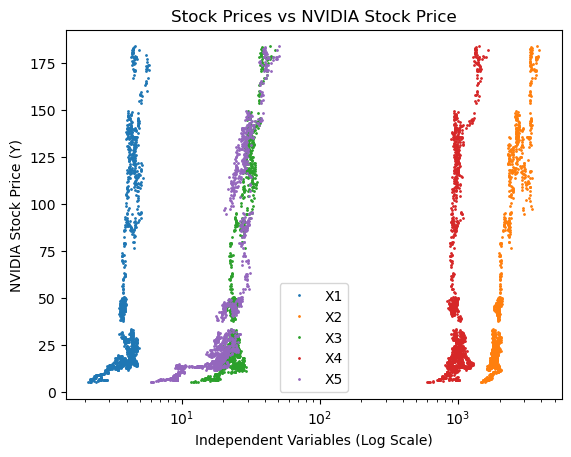

In [ ]:
plot_data_log_y(data4)

### LRM

In [ ]:
df = std_filter(pd.DataFrame(data4))

df = df.dropna()  # remove rows with missing data

X = df.drop('Y', axis=1)
y = df['Y']

# Initialize and fit the model
model = LinearRegression()
model.fit(X, y)

Coefs = []

# Print coefficients to show the importance of each variable
for var, coef in zip(X.columns, model.coef_):
    print(f"{var}: {coef}")
    Coefs.append([var, coef])

X1: -4.933144176379984
X2: 0.06786775319346967
X3: 2.2391319832137175
X4: -0.08703412257721406
X5: 1.8639337215709517


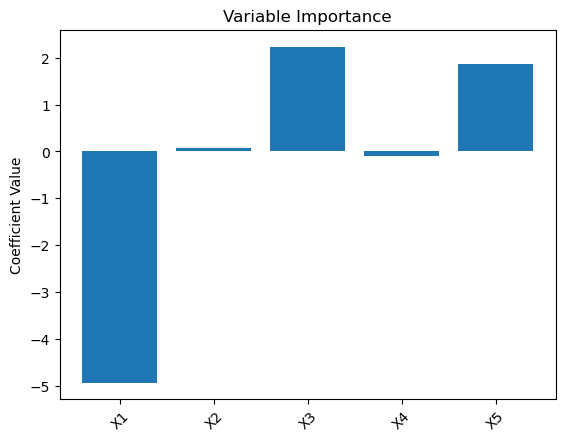

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

names = [item[0] for item in Coefs]
values = [float(item[1]) for item in Coefs]  # ensure values are floats

plt.bar(names, values)
plt.xticks(rotation=45)
plt.ylabel('Coefficient Value')
plt.title('Variable Importance')
plt.show()

### Testing model

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

df = std_filter(pd.DataFrame(data4).dropna())

# Exclude dependent variable Y for VIF calculation
X = df[[f"X{i}" for i in range(1, len(df.columns))]]

# Add constant term for intercept
X = sm.add_constant(X)

# Calculate VIF for each explanatory variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

  Variable         VIF
0    const  872.106788
1       X1    1.239197
2       X2    2.723760
3       X3    2.680199
4       X4    2.518707
5       X5    2.125394


its useless 

## 2000-2019 LRM 5 (Yearly)

### Data

In [ ]:
nvda.history(start="2000-1-1")["Close"]

Date
2000-01-03 00:00:00-05:00      0.089420
2000-01-04 00:00:00-05:00      0.087033
2000-01-05 00:00:00-05:00      0.084167
2000-01-06 00:00:00-05:00      0.078675
2000-01-07 00:00:00-05:00      0.079989
                                ...    
2025-10-23 00:00:00-04:00    182.160004
2025-10-24 00:00:00-04:00    186.259995
2025-10-27 00:00:00-04:00    191.490005
2025-10-28 00:00:00-04:00    201.029999
2025-10-29 00:00:00-04:00    207.244995
Name: Close, Length: 6496, dtype: float64

In [ ]:
copper_data = pd.read_excel('Copper Historical Statistics.xlsx', sheet_name="Copper")

copper_data[(124-20):124]

filtered_copper_data = copper_data[(124-20):124]["Unnamed: 1"] + copper_data[(124-20):124]["Unnamed: 2"]



In [ ]:
import pandas as pd

In [ ]:
Gold_data

,GOLD STATISTICS1,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,U.S. GEOLOGICAL SURVEY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[All values are in metric tons (t) gold conten...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Last modification: November 20, 2023",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Year,Primary production,Secondary production,Imports,Exports,Reported consumption,Unit value ($/t),Unit value (98$/t),World production
4,1900,120,NaN,NaN,NaN,33.2,609000,11900000,386
...,...,...,...,...,...,...,...,...,...
125,2021,187,92,192,386,265,57900000,34800000,3120
126,2022,173,93,138,420,257,57900000,32300000,3160
127,NA Not available.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
128,"1Compiled by K.E. Porter, E.B. Amey, M.W. Geor...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
silver_data = pd.read_excel('Silver Historical Statistics.xlsx', sheet_name="Silver")
Tin_data = pd.read_excel('Tin Historical Statistics.xlsx', sheet_name="Tin")
Silicon_data = pd.read_excel('Silicon Historical Statistics.xlsx', sheet_name="Silicon")
Aluminum_data = pd.read_excel('Aluminum Historical Statistics.xlsx', sheet_name="Aluminum")
Rare_Earths_data = pd.read_excel('Rare Earths Historical Statistics.xlsx', sheet_name="Rare earths")
Gold_data = pd.read_excel('Gold Historical Statistics.xlsx', sheet_name="Gold")

filtered_silver_data = silver_data[(124-20):124]["Unnamed: 11"] #+ silver_data[(124-20):124]["Unnamed: 2"]
filtered_Tin_data = Tin_data[(124-20):124]["Unnamed: 11"] #+ Tin_data[(124-20):124]["Unnamed: 2"]
filtered_Silicon_data = Silicon_data[(102-21):101]["Unnamed: 9"] #+ Silicon_data[(102-21):101]["Unnamed: 2"]
filtered_Aluminum_data = Aluminum_data[(124-20):124]["Unnamed: 15"] #+ Aluminum_data[(124-20):124]["Unnamed: 2"]
filtered_Rare_Earths_data = Rare_Earths_data[(124-20):124]["Unnamed: 7"] #+ Rare_Earths_data[(124-20):124]["Unnamed: 2"]
filtered_Gold_data = Gold_data[(124-20):124]["Unnamed: 8"] #+ Gold_data[(124-20):124]["Unnamed: 2"]

filtered_Silicon_data

81     3500000
82     3500000
83     3720000
84     4390000
85     4900000
86     5310000
87     5650000
88     6330000
89     6510000
90     6260000
91     6930000
92     7370000
93     7450000
94     7950000
95     7900000
96     7800000
97     7700000
98     7230000
99     8890000
100    8560000
Name: Unnamed: 9, dtype: object

In [ ]:
nvda_d = nvda.history(start="2000-01-01", end="2020-1-1")['Close'].resample('YE').last()

filtered_silver_data.index = nvda_d.index
filtered_Tin_data.index = nvda_d.index
filtered_Silicon_data.index = nvda_d.index
filtered_Aluminum_data.index = nvda_d.index
filtered_Rare_Earths_data.index = nvda_d.index
filtered_Gold_data.index = nvda_d.index

NameError: name 'nvda' is not defined

In [ ]:
nvda_d = nvda.history(start="2000-01-01", end="2020-1-1")['Close'].resample('YE').last()
filtered_copper_data.index = nvda_d.index

filtered_Gold_data.index = nvda_d.index

filtered_copper_data


Date
2000-12-31 00:00:00-05:00    1938000
2001-12-31 00:00:00-05:00    1947000
2002-12-31 00:00:00-05:00    1630000
2003-12-31 00:00:00-05:00    1457000
2004-12-31 00:00:00-05:00    1451000
2005-12-31 00:00:00-05:00    1393000
2006-12-31 00:00:00-05:00    1361000
2007-12-31 00:00:00-05:00    1432000
2008-12-31 00:00:00-05:00    1379000
2009-12-31 00:00:00-05:00    1248000
2010-12-31 00:00:00-05:00    1203000
2011-12-31 00:00:00-05:00    1145000
2012-12-31 00:00:00-05:00    1126000
2013-12-31 00:00:00-05:00    1159000
2014-12-31 00:00:00-05:00    1223000
2015-12-31 00:00:00-05:00    1256000
2016-12-31 00:00:00-05:00    1329000
2017-12-31 00:00:00-05:00    1186000
2018-12-31 00:00:00-05:00    1211000
2019-12-31 00:00:00-05:00    1151000
Freq: YE-DEC, dtype: object

In [ ]:
data5 = {
    "X1": filtered_copper_data.astype('float64'),
    "X2": filtered_Gold_data.astype('float64'),
    "X3": filtered_silver_data.astype('float64'),
    "X4": filtered_Silicon_data.astype('float64'),
    "X5": filtered_Tin_data.astype('float64'),
    "X6": filtered_Aluminum_data.astype('float64'),
    "X7": filtered_Rare_Earths_data.astype('float64'),


    "Y": nvda.history(start="2000-01-01", end="2020-1-1")['Close'].resample('YE').last()
}

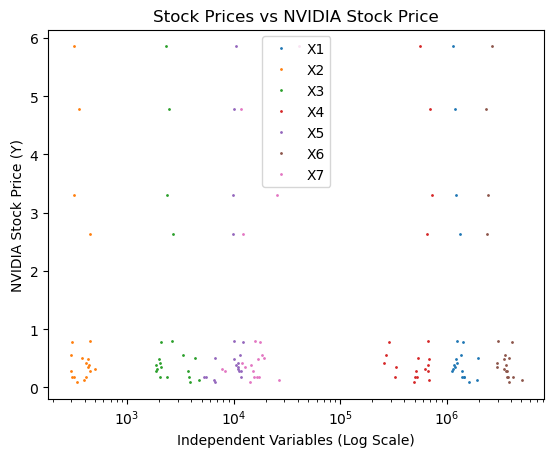

In [ ]:
plot_data_log_y(data5)

In [ ]:
df = pd.DataFrame(data5)

df

,X1,X2,X3,X4,X5,X6,X7,Y
Date,,,,,,,,
2000-12-31 00:00:00-05:00,1938000.0,393.0,4760.0,687000.0,6560.0,5038000.0,26700.0,0.125176
2001-12-31 00:00:00-05:00,1947000.0,375.5,4380.0,532000.0,6700.0,3847000.0,19200.0,0.511164
2002-12-31 00:00:00-05:00,1630000.0,336.3,3930.0,493000.0,6760.0,3877000.0,14200.0,0.087945
2003-12-31 00:00:00-05:00,1457000.0,321.0,3820.0,508000.0,5500.0,3773000.0,16700.0,0.177264
2004-12-31 00:00:00-05:00,1451000.0,303.0,2390.0,527000.0,5240.0,3676000.0,17300.0,0.180015
2005-12-31 00:00:00-05:00,1393000.0,296.0,3760.0,516000.0,11800.0,3561000.0,15300.0,0.279345
2006-12-31 00:00:00-05:00,1361000.0,296.0,3370.0,269000.0,11600.0,3544000.0,18500.0,0.565565
2007-12-31 00:00:00-05:00,1432000.0,304.0,2071.0,287000.0,12200.0,4094000.0,17700.0,0.779811
2008-12-31 00:00:00-05:00,1379000.0,414.0,2029.0,328000.0,11700.0,4158000.0,15400.0,0.184982


### LRM

In [ ]:
df = pd.DataFrame(data5)

df = df.dropna()  # remove rows with missing data

X = df.drop('Y', axis=1)
y = df['Y']

# Initialize and fit the model
model = LinearRegression()
model.fit(X, y)

Coefs5 = []

# Print coefficients to show the importance of each variable
for var, coef in zip(X.columns, model.coef_):
    print(f"{var}: {coef}")
    Coefs5.append([var, coef])

print("Intercept:", model.intercept_)


X1: 2.1427334169294704e-06
X2: -0.004904130592938717
X3: -0.0003645892971493007
X4: 3.0050178928140784e-06
X5: 0.00015628784710531327
X6: -1.7334132153701409e-06
X7: 9.814926944546836e-05
Intercept: 2.220611182160896


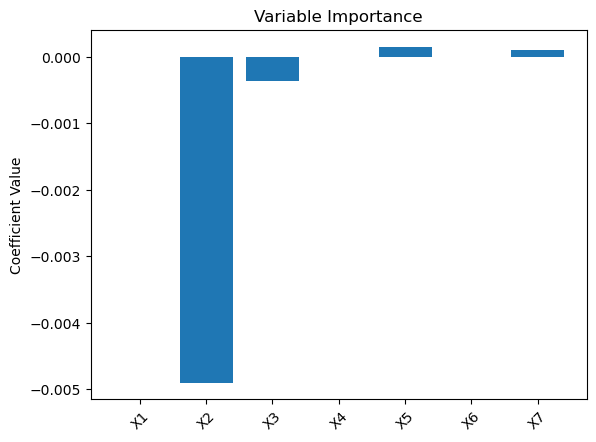

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

names = [item[0] for item in Coefs5]
values = [float(item[1]) for item in Coefs5]  # ensure values are floats

plt.bar(names, values)
plt.xticks(rotation=45)
plt.ylabel('Coefficient Value')
plt.title('Variable Importance')
plt.show()

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

df = pd.DataFrame(data5).dropna()

# Exclude dependent variable Y for VIF calculation
X = df[[f"X{i}" for i in range(1,len(df.columns))]]

# Ensure all data is numeric and handle any conversion issues
X = X.apply(pd.to_numeric, errors='coerce').dropna()

# Check if we have enough data after cleaning
if len(X) == 0:
    print("No valid numeric data available for VIF calculation")
else:
    # Add constant term for intercept
    X = sm.add_constant(X)
    
    # Calculate VIF for each explanatory variable
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    
    print(vif_data)

  Variable         VIF
0    const  273.662453
1       X1    7.193552
2       X2    2.047702
3       X3    4.798947
4       X4    1.769217
5       X5    2.257077
6       X6    2.049521
7       X7    1.482151


In [ ]:
import statsmodels.api as sm

df = pd.DataFrame(data5).dropna()

# Assume df is your DataFrame with independent variables X1, X2,... and dependent variable Y
X = df.drop('Y', axis=1)
y = df['Y']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Get summary which includes p-values
print(model.summary())

# Or just get the p-values directly:
p_values = model.pvalues
print(p_values)

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     8.024
Date:                Wed, 29 Oct 2025   Prob (F-statistic):           0.000987
Time:                        13:42:35   Log-Likelihood:                -20.679
No. Observations:                  20   AIC:                             57.36
Df Residuals:                      12   BIC:                             65.32
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2206      3.250      0.683      0.5

## LRM 6

In [ ]:
goog.history(start="2020-01-01")['Close'].resample('YE').last()

Date
2020-12-31 00:00:00-05:00     86.998650
2021-12-31 00:00:00-05:00    143.696152
2022-12-31 00:00:00-05:00     88.126930
2023-12-31 00:00:00-05:00    139.972137
2024-12-31 00:00:00-05:00    189.825241
2025-12-31 00:00:00-05:00    274.499908
Freq: YE-DEC, Name: Close, dtype: float64

### Data

In [ ]:
data6 = {
    # "X1": asml.history(start="2000-01-01", end="2020-1-1")['Close'].resample('YE').last(), 
    # "X2": aapl.history(start="2000-01-01", end="2020-1-1")['Close'].resample('YE').last(), 
    # "X3": goog.history(start="2000-01-01", end="2020-1-1")['Close'].resample('YE').last(), # went public in Aug 2004 
    # "X1": tsmc.history(start="2000-01-01", end="2020-1-1")['Close'].resample('YE').last(),
    "X1":  amd.history(start="2000-01-01", end="2020-1-1")['Close'].resample('YE').last(), 
    
    "X2": filtered_copper_data,
    "X3": filtered_Gold_data,
    "X4": filtered_silver_data,
    "X5": filtered_Silicon_data,
    "X6": filtered_Tin_data,
    "X7": filtered_Aluminum_data,
    "X8": filtered_Rare_Earths_data,

    "Y": nvda.history(start="2000-01-01", end="2020-1-1")['Close'].resample('YE').last(),
}

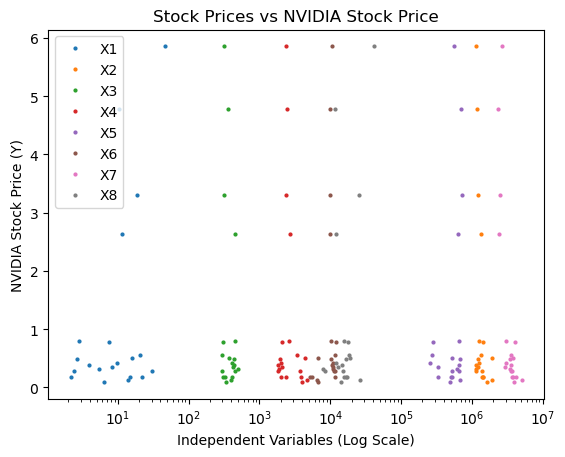

In [ ]:
plot_data_log_y(data6,2)

Text(0, 0.5, 'NVIDIA Stock Price (Y)')

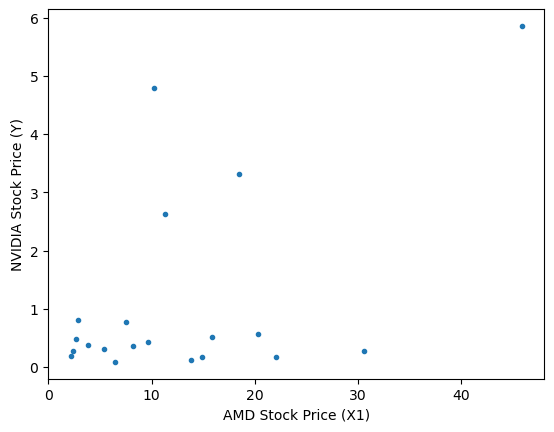

In [ ]:
plt.plot(data6["X1"], data6["Y"],  marker='o', markersize=3, linestyle='')

plt.xlabel('AMD Stock Price (X1)')
plt.ylabel('NVIDIA Stock Price (Y)')

In [ ]:
df23 = pd.DataFrame(data6)

df23.std().index

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'Y'], dtype='object')

In [ ]:
df23.std().index

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'Y'], dtype='object')

Text(0.5, 1.0, 'Range of Each Variable')

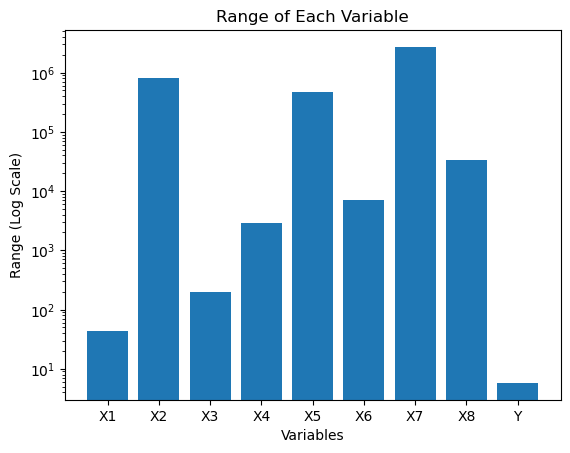

In [ ]:
ranges = []

for i in df23: 
    ranges.append(df23[i].max() - df23[i].min())

plt.bar(df23.std().index, ranges)

plt.yscale('log')

plt.xlabel('Variables')
plt.ylabel('Range (Log Scale)')
plt.title('Range of Each Variable')

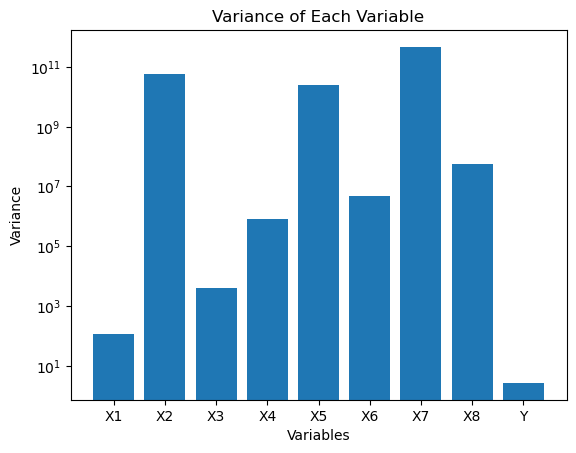

In [ ]:
df23 = pd.DataFrame(data6) #[data6["X1"], data6["Y"]]

plt.bar(df23.var().index, df23.var())

plt.xlabel('Variables')
plt.ylabel('Variance')
plt.title('Variance of Each Variable')

plt.yscale('log')

Text(0.5, 1.0, 'Residuals between X2 and Y')

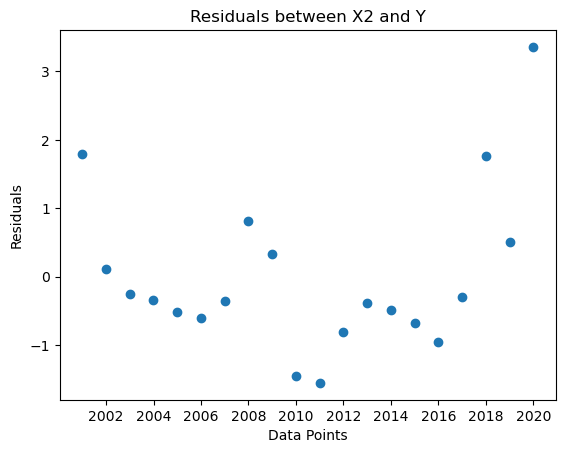

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

df = pd.DataFrame(data6).dropna()

# Example data
data = {'X': df["X7"].astype('float64'),
        'Y': df["Y"].astype('float64')}
df = pd.DataFrame(data)

# Scikit-learn approach
model_sklearn = LinearRegression()
model_sklearn.fit(df[['X']], df['Y'])
df['Y_pred_sklearn'] = model_sklearn.predict(df[['X']])

# Statsmodels approach (provides more detailed regression output)
X = sm.add_constant(df['X']) # Add a constant for the intercept
model_sm = sm.OLS(df['Y'], X)
results_sm = model_sm.fit()
df['Y_pred_sm'] = results_sm.predict(X)

df['Residuals'] = df['Y'] - df['Y_pred_sklearn'] # Or df['Y_pred_sm']

plt.plot(df['Residuals'], marker='o', linestyle='')

plt.xlabel('Data Points')
plt.ylabel('Residuals')
plt.title('Residuals between X2 and Y')

In [ ]:
df = pd.DataFrame(data).dropna()

plt.plot(df["X1"], df["Y"],  marker='o', markersize=3, linestyle='')

KeyError: 'X1'

/var/folders/wb/pmxl4r0s6svgkb08w2drl86c0000gn/T/ipykernel_11078/3106765276.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  variance_per_bin = residuals.groupby(bins).var()


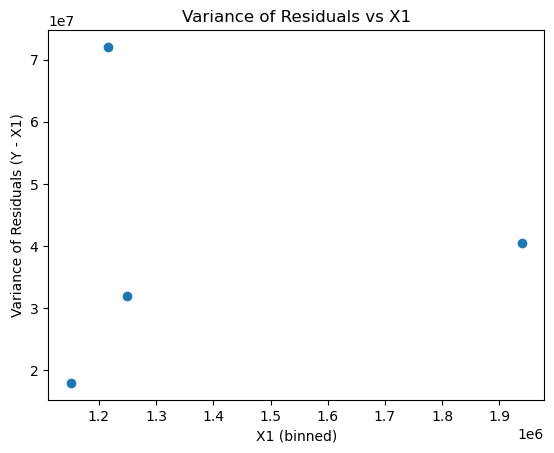

In [ ]:
# Assuming data6 dictionary is loaded and contains pandas Series for 'X1' and 'Y'
df = pd.DataFrame({
    'X1': data6['X2'],
    'Y': data6['Y']
}).dropna()

# Calculate residuals (difference between Y and X1 values)
residuals = df['Y'] - df['X1']

# Bin X1 values to calculate variance of residuals per bin
bins = pd.cut(df['X1'], bins=50)
variance_per_bin = residuals.groupby(bins).var()

# Get bin centers for plotting
bin_centers = [interval.mid for interval in variance_per_bin.index]

# Plot variance of residuals by X1 bins
plt.plot(bin_centers, variance_per_bin, marker='o')
plt.xlabel('X1 (binned)')
plt.ylabel('Variance of Residuals (Y - X1)')
plt.title('Variance of Residuals vs X1')
plt.show()

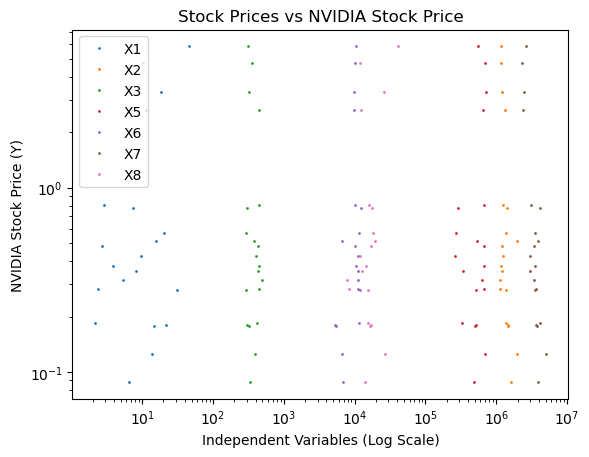

In [ ]:
df = pd.DataFrame(data6)

for i in df:
    if i == "Y":
        continue
    if i == "X4":
        continue

    # Convert columns to numeric, forcing errors to NaN
    x = pd.to_numeric(df[i], errors='coerce').to_numpy()
    y = pd.to_numeric(df["Y"], errors='coerce').to_numpy()

    # Optional: remove NaNs from both arrays (if needed)
    mask = ~np.isnan(x) & ~np.isnan(y)
    x = x[mask]
    y = y[mask]

    slope, intercept = np.polyfit(x, y, 1)

    plt.plot(x, y, label=i, marker='o', markersize=1, linestyle='')

    # best_fit_line = slope * x + intercept
    # plt.plot(x, best_fit_line, label=f'BFL: {i}', linewidth=1) #BFL = Best Fit Line

plt.legend()
plt.xlabel('Independent Variables (Log Scale)')
plt.ylabel('NVIDIA Stock Price (Y)')
plt.title('Stock Prices vs NVIDIA Stock Price')

plt.yscale('log')
plt.xscale('log')

#! THIS IS ONLY FOR DATA 1

In [ ]:
data6

{'X1': Date
 2000-12-31 00:00:00-05:00    13.812500
 2001-12-31 00:00:00-05:00    15.860000
 2002-12-31 00:00:00-05:00     6.460000
 2003-12-31 00:00:00-05:00    14.900000
 2004-12-31 00:00:00-05:00    22.020000
 2005-12-31 00:00:00-05:00    30.600000
 2006-12-31 00:00:00-05:00    20.350000
 2007-12-31 00:00:00-05:00     7.500000
 2008-12-31 00:00:00-05:00     2.160000
 2009-12-31 00:00:00-05:00     9.680000
 2010-12-31 00:00:00-05:00     8.180000
 2011-12-31 00:00:00-05:00     5.400000
 2012-12-31 00:00:00-05:00     2.400000
 2013-12-31 00:00:00-05:00     3.870000
 2014-12-31 00:00:00-05:00     2.670000
 2015-12-31 00:00:00-05:00     2.870000
 2016-12-31 00:00:00-05:00    11.340000
 2017-12-31 00:00:00-05:00    10.280000
 2018-12-31 00:00:00-05:00    18.459999
 2019-12-31 00:00:00-05:00    45.860001
 Freq: YE-DEC, Name: Close, dtype: float64,
 'X2': Date
 2000-12-31 00:00:00-05:00    1938000
 2001-12-31 00:00:00-05:00    1947000
 2002-12-31 00:00:00-05:00    1630000
 2003-12-31 00:00:

### LRM

In [ ]:
df = pd.DataFrame(data6)

df = df.dropna()  # remove rows with missing data

X = df.drop('Y', axis=1)
y = df['Y']

# Initialize and fit the model
model = LinearRegression()
model.fit(X, y)

Coefs6 = []

# Print coefficients to show the importance of each variable
for var, coef in zip(X.columns, model.coef_):
    print(f"{var}: {coef}")
    Coefs6.append([var, coef])

X1: -0.001198277995346521
X2: 2.121372506491394e-06
X3: -0.004964351937410559
X4: -0.00035806652363368414
X5: 2.9968861383947944e-06
X6: 0.00015624792021114357
X7: -1.7373077222632828e-06
X8: 9.914475209241317e-05


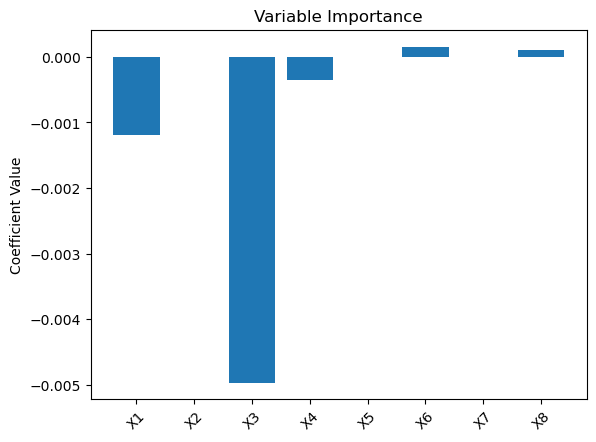

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

names = [item[0] for item in Coefs6]
values = [float(item[1]) for item in Coefs6]  # ensure values are floats

plt.bar(names, values)
plt.xticks(rotation=45)
plt.ylabel('Coefficient Value')
plt.title('Variable Importance')
plt.show()

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

df = pd.DataFrame(data6).dropna()

# Exclude dependent variable Y for VIF calculation
X = df[[f"X{i}" for i in range(1,len(df.columns))]]

# Ensure all data is numeric and handle any conversion issues
X = X.apply(pd.to_numeric, errors='coerce').dropna()

VIFs = []

# Check if we have enough data after cleaning
if len(X) == 0:
    print("No valid numeric data available for VIF calculation")
else:
    # Add constant term for intercept
    X = sm.add_constant(X)
    
    # Calculate VIF for each explanatory variable
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    
    VIFs = vif_data

    print(vif_data)

  Variable         VIF
0    const  339.363426
1       X1    4.187708
2       X2    7.829250
3       X3    2.419082
4       X4    5.676563
5       X5    1.809273
6       X6    2.257268
7       X7    2.218292
8       X8    2.809731


In [ ]:
df0 = pd.DataFrame(VIFs["VIF"][1:9]).mean()

df0

VIF    3.650896
dtype: float64

In [ ]:
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

df = std_filter(pd.DataFrame(data6).dropna())

X = df[[f'X{i}' for i in range(1, len(df.columns))]]
X = sm.add_constant(X)
y = df['Y']

model = sm.OLS(y, X).fit()

# print(f"Length of model.resid: {len(model.resid)}")
# print(f"Shape of model.model.exog: {model.model.exog.shape}")
# print(np.isnan(model.resid).any(), np.isinf(model.resid).any())
# print(np.isnan(model.model.exog).any(), np.isinf(model.model.exog).any())
# exog_df = pd.DataFrame(model.model.exog)
# print(exog_df.columns[exog_df.nunique() == 1])  # constant columns
# print(exog_df.columns.duplicated()) 

#Whitest test for heteroscedasticity
white_test = sms.het_white(model.resid, model.model.exog)

labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']
for label, value in zip(labels, white_test):
    print(f"{label}: {value}")

Test Statistic: 2.0
Test Statistic p-value: 0.15729920705028105
F-Statistic: nan
F-Test p-value: nan


In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

# Create DataFrame from data dictionary
df = std_filter(pd.DataFrame(data3))

# Drop rows with missing values to avoid errors during modeling
df = df.dropna()

# Build the formula string dynamically from your independent variables
independent_vars = "+".join([f"X{i}" for i in range(1, len(df.columns))])
formula = f"Y ~ {independent_vars}"

# Fit the OLS regression model
model = smf.ols(formula=formula, data=df).fit()

# Run the Breusch-Pagan test for heteroscedasticity
bp_test = sms.het_breuschpagan(model.resid, model.model.exog)
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']

# Print Breusch-Pagan test results
for label, value in zip(labels, bp_test):
    print(f"{label}: {value}")

Lagrange multiplier statistic: 10.15310461762969
p-value: 0.18006193145882976
f-value: 1.6935338931708044
f p-value: 0.18526598022334895


### Export data to excel for Gerry

In [ ]:
pd1 = std_filter(pd.DataFrame(data))
pd1.index = pd1.index.tz_localize(None)
pd2 = std_filter(pd.DataFrame(data2))
pd2.index = pd2.index.tz_localize(None)
pd3 = std_filter(pd.DataFrame(data3))
pd3.index = pd3.index.tz_localize(None)
pd4 = std_filter(pd.DataFrame(data4))
pd4.index = pd4.index.tz_localize(None)
pd5 = pd.DataFrame(data5)
pd5.index = pd5.index.tz_localize(None)
pd6 = pd.DataFrame(data6)
pd6.index = pd6.index.tz_localize(None)

# with pd.ExcelWriter('LRM_Data.xlsx') as writer:
#     pd1.to_excel(writer, sheet_name='LRM1')
#     pd2.to_excel(writer, sheet_name='LRM2')
#     pd3.to_excel(writer, sheet_name='LRM3')
#     pd4.to_excel(writer, sheet_name='LRM4')
#     pd5.to_excel(writer, sheet_name='LRM5')


with pd.ExcelWriter('LRM_Data2.xlsx') as writer:
    pd6.to_excel(writer, sheet_name='LRM6')

NameError: name 'std_filter' is not defined

### ALL Data In One Graph

In [ ]:
Excel3

,Average retail price of electricity,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,https://www.eia.gov/electricity/data/browser/#...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Wed Oct 01 2025 10:58:29 GMT-0600 (Central Sta...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Source: U.S. Energy Information Administration,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,description,units,source key,2001,2002,2003,2004,2005,2006,2007,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
4,Average retail price of electricity,cents per kilowatthour,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,United States,cents per kilowatthour,ELEC.PRICE.US-ALL.A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,United States : all sectors,cents per kilowatthour,ELEC.PRICE.US-ALL.A,7.29,7.2,7.44,7.61,8.14,8.9,9.13,...,10.41,10.27,10.48,10.53,10.54,10.59,11.1,12.36,12.68,12.99
7,United States : residential,cents per kilowatthour,ELEC.PRICE.US-RES.A,8.58,8.44,8.72,8.95,9.45,10.4,10.65,...,12.65,12.55,12.89,12.87,13.01,13.15,13.66,15.04,16,16.48
8,United States : commercial,cents per kilowatthour,ELEC.PRICE.US-COM.A,7.92,7.89,8.03,8.17,8.67,9.46,9.65,...,10.64,10.43,10.66,10.67,10.68,10.59,11.22,12.41,12.59,12.85
9,United States : industrial,cents per kilowatthour,ELEC.PRICE.US-IND.A,5.05,4.88,5.11,5.25,5.73,6.16,6.39,...,6.91,6.76,6.88,6.92,6.81,6.67,7.18,8.32,8.04,8.15


In [ ]:
Excel3 = pd.read_excel('EE-Data1.xlsx', sheet_name='Sheet2')

Commercial = Excel3["Unnamed: 1"][15:35].astype('float64')
Industrial = Excel3["Unnamed: 2"][15:35].astype('float64')

Commercial.index = nvda.history(start="2000-01-01", end="2020-1-1")['Close'].resample('YE').last().index
Industrial.index = nvda.history(start="2000-01-01", end="2020-1-1")['Close'].resample('YE').last().index

Industrial.index

DatetimeIndex(['2000-12-31 00:00:00-05:00', '2001-12-31 00:00:00-05:00',
               '2002-12-31 00:00:00-05:00', '2003-12-31 00:00:00-05:00',
               '2004-12-31 00:00:00-05:00', '2005-12-31 00:00:00-05:00',
               '2006-12-31 00:00:00-05:00', '2007-12-31 00:00:00-05:00',
               '2008-12-31 00:00:00-05:00', '2009-12-31 00:00:00-05:00',
               '2010-12-31 00:00:00-05:00', '2011-12-31 00:00:00-05:00',
               '2012-12-31 00:00:00-05:00', '2013-12-31 00:00:00-05:00',
               '2014-12-31 00:00:00-05:00', '2015-12-31 00:00:00-05:00',
               '2016-12-31 00:00:00-05:00', '2017-12-31 00:00:00-05:00',
               '2018-12-31 00:00:00-05:00', '2019-12-31 00:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', freq='YE-DEC')

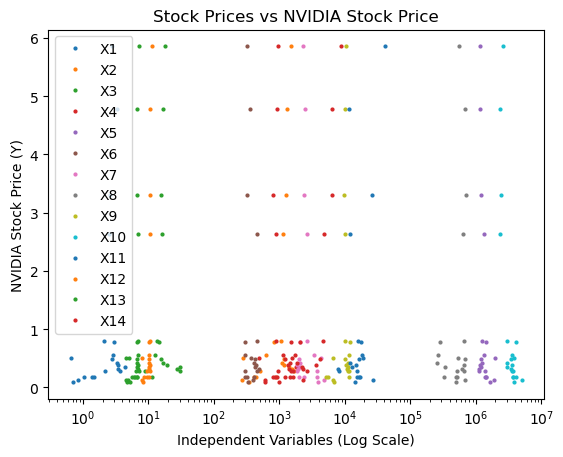

In [ ]:

dataALL = {
    # "X1": asml.history(start="2000-01-01", end="2020-1-1")['Close'].resample('YE').last(), 
    # "X2": aapl.history(start="2000-01-01", end="2020-1-1")['Close'].resample('YE').last(), 
    # "X3": s_p.history(start="2000-01-01", end="2020-1-1")['Close'].resample('YE').last(),
    # "X1": tsmc.history(start="2000-01-01", end="2020-1-1")['Close'].resample('YE').last(),
    # "X3":  amd.history(start="2000-01-01", end="2020-1-1")['Close'].resample('YE').last(), 
    
    "X1": copper.history(start="2000-01-01", end="2020-1-1")['Close'].resample("YE").last(), #
    "X2": gold.history(start="2000-01-01", end="2020-1-1")['Close'].resample("YE").last(),
    "X3": silver.history(start="2000-01-01", end="2020-1-1")['Close'].resample("YE").last(),
    "X4": platinum.history(start="2000-01-01", end="2020-1-1")['Close'].resample("YE").last(), #
    # "X5": uranium.history(start="2000-01-01", end="2020-1-1")['Close'].resample("YE").last(), #

    "X5": filtered_copper_data,
    "X6": filtered_Gold_data,
    "X7": filtered_silver_data,
    "X8": filtered_Silicon_data,
    "X9": filtered_Tin_data,
    "X10": filtered_Aluminum_data,
    "X11": filtered_Rare_Earths_data,

    "X12": Commercial, #* US commercial electricity price
    "X13": Industrial, #* US commercial electricity price

    "X14": ndx.history(start="2000-01-01", end="2020-1-1")['Close'].resample('YE').last(),

    "Y": nvda.history(start="2000-01-01", end="2020-1-1")['Close'].resample('YE').last(),
}

plot_data_log_y(dataALL,2)

In [ ]:
df = pd.DataFrame(dataALL)

df = df.dropna()  # remove rows with missing data

X = df.drop('Y', axis=1)
y = df['Y']

# Initialize and fit the model
model = LinearRegression()
model.fit(X, y)

Coefs6 = []

# Print coefficients to show the importance of each variable
for var, coef in zip(X.columns, model.coef_):
    print(f"{var}: {coef}")
    Coefs6.append([var, coef])

X1: 0.45164802619630157
X2: 0.0021986184902052
X3: 0.0027035355442161795
X4: -0.002995551445172692
X5: 1.8621035286820479e-06
X6: -0.00868327486960965
X7: -9.013659040642634e-05
X8: -4.352461504472273e-06
X9: -6.63116855075043e-05
X10: 4.1113949854533225e-07
X11: -8.131331528676757e-05
X12: -1.8702010644325837
X13: 2.1485463599706027
X14: 0.0010676335232946772


In [ ]:
df = pd.DataFrame(dataALL).astype('float64')

df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,Y
Date,,,,,,,,,,,,,,,
2000-12-31 00:00:00-05:00,0.8465,272.000000,4.585000,609.599976,1938000.0,393.0,4760.0,687000.0,6560.0,5038000.0,26700.0,7.89,4.88,2341.699951,0.125176
2001-12-31 00:00:00-05:00,0.6530,278.700012,4.579000,493.000000,1947000.0,375.5,4380.0,532000.0,6700.0,3847000.0,19200.0,8.03,5.11,1577.050049,0.511164
2002-12-31 00:00:00-05:00,0.6970,347.600006,4.801000,604.400024,1630000.0,336.3,3930.0,493000.0,6760.0,3877000.0,14200.0,8.17,5.25,984.369995,0.087945
2003-12-31 00:00:00-05:00,1.0430,415.700012,5.953000,811.299988,1457000.0,321.0,3820.0,508000.0,5500.0,3773000.0,16700.0,8.67,5.73,1467.920044,0.177264
2004-12-31 00:00:00-05:00,1.4870,437.500000,6.807000,863.700012,1451000.0,303.0,2390.0,527000.0,5240.0,3676000.0,17300.0,9.46,6.16,1621.119995,0.180015
2005-12-31 00:00:00-05:00,2.1615,517.099976,8.820000,973.000000,1393000.0,296.0,3760.0,516000.0,11800.0,3561000.0,15300.0,9.65,6.39,1645.199951,0.279345
2006-12-31 00:00:00-05:00,2.8540,635.200012,12.818000,1139.300049,1361000.0,296.0,3370.0,269000.0,11600.0,3544000.0,18500.0,10.26,6.96,1756.900024,0.565565
2007-12-31 00:00:00-05:00,3.0305,834.900024,14.797000,1528.400024,1432000.0,304.0,2071.0,287000.0,12200.0,4094000.0,17700.0,10.16,6.83,2084.929932,0.779811
2008-12-31 00:00:00-05:00,1.3950,883.599976,11.270000,936.200012,1379000.0,414.0,2029.0,328000.0,11700.0,4158000.0,15400.0,10.19,6.77,1211.650024,0.184982


In [ ]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

df = pd.DataFrame(dataALL).dropna()

# Exclude dependent variable Y for VIF calculation
X = df[[f"X{i}" for i in range(1,len(df.columns))]]

# Ensure all data is numeric and handle any conversion issues
X = X.apply(pd.to_numeric, errors='coerce').dropna()

# Check if we have enough data after cleaning
if len(X) == 0:
    print("No valid numeric data available for VIF calculation")
else:
    # Add constant term for intercept
    X = sm.add_constant(X)
    
    # Calculate VIF for each explanatory variable
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    
    print(vif_data)

   Variable          VIF
0     const  7298.911323
1        X1    54.148925
2        X2   136.635998
3        X3    78.241334
4        X4    42.983331
5        X5    19.797512
6        X6     4.399444
7        X7    20.522467
8        X8     8.282475
9        X9     9.426158
10      X10    10.246741
11      X11     8.008994
12      X12   348.860185
13      X13   236.038899
14      X14    53.863244
